# Welcome to Covid19 Data Analysis Notebook(Total Deaths)
------------------------------------------

### Let's Import the modules 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "covid19_deaths_dataset.csv" from "./Dataset2 for Practice" folder. 


In [3]:
corona_dataset_csv = pd.read_csv("Dataset2/covid19_deaths_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### Let's check the shape of the dataframe

In [4]:
corona_dataset_csv.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [5]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [6]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### Task 2.3: Aggregating the rows by the country

In [7]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [8]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [9]:
corona_dataset_aggregated.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

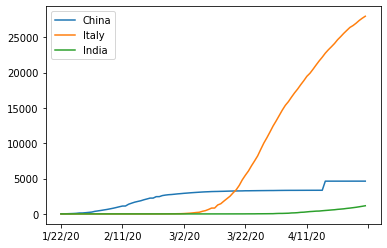

In [10]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["India"].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<AxesSubplot:>

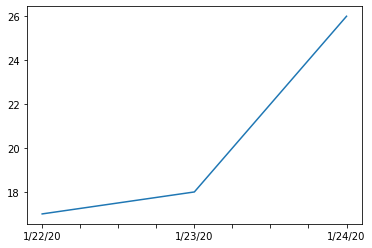

In [11]:
corona_dataset_aggregated.loc['China'][:3].plot()

### task 3.1: caculating the first derivative of the curve

<AxesSubplot:>

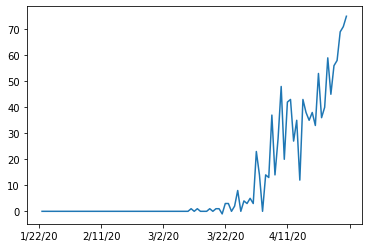

In [12]:
corona_dataset_aggregated.loc["India"].diff().plot()

### task 3.2: find maxmimum death rate for India

In [13]:
corona_dataset_aggregated.loc["India"].diff().max()

75.0

In [14]:
corona_dataset_aggregated.loc["Italy"].diff().max()

919.0

In [15]:
corona_dataset_aggregated.loc["Spain"].diff().max()

961.0

### Task 3.3: find maximum death rate for all of the countries. 

In [16]:
countries = list(corona_dataset_aggregated.index)
max_death_rates = []
for c in countries:
    max_death_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_death_rate"]=max_death_rates

In [17]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


### Task 3.4: create a new dataframe with only needed column 

In [18]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_death_rate"])

In [19]:
corona_data.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [20]:
happiness_report_csv = pd.read_csv("Dataset/worldwide_happiness_report.csv")

In [21]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [22]:
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [23]:
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [24]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [25]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [26]:
happiness_report_csv.shape

(156, 4)

In [34]:
data = corona_data.join(happiness_report_csv,how="inner")
x=data["max_death_rate"]>0

In [35]:
data=data[x]

### Task 4.5: correlation matrix 

In [36]:
data.corr()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.245063,0.202206,0.302945,0.082132
GDP per capita,0.245063,1.000000,0.750481,0.865584,0.406969
Social support,0.202206,0.750481,1.000000,0.756453,0.457669
Healthy life expectancy,0.302945,0.865584,0.756453,1.000000,0.426723
Freedom to make life choices,0.082132,0.406969,0.457669,0.426723,1.000000


### Task 5: Visualization of the results
Our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [37]:
data.head()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

<AxesSubplot:xlabel='GDP per capita', ylabel='max_death_rate'>

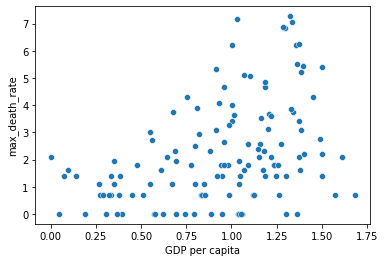

In [38]:
x=data["GDP per capita"]
y=data["max_death_rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='GDP per capita', ylabel='max_death_rate'>

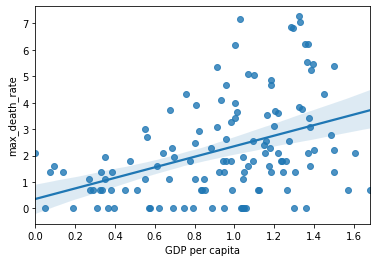

In [39]:
sns.regplot(x=x,y=np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

<AxesSubplot:xlabel='Social support', ylabel='max_death_rate'>

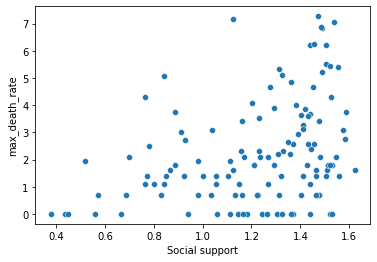

In [40]:
x=data["Social support"]
y=data["max_death_rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='max_death_rate'>

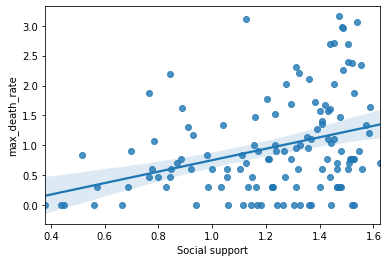

In [41]:
sns.regplot(x=x,y=np.log10(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_death_rate'>

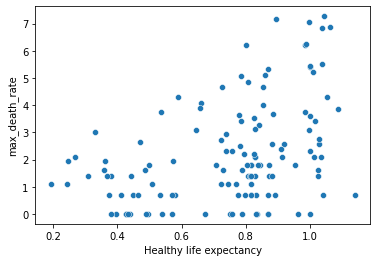

In [42]:
x=data["Healthy life expectancy"]
y=data["max_death_rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_death_rate'>

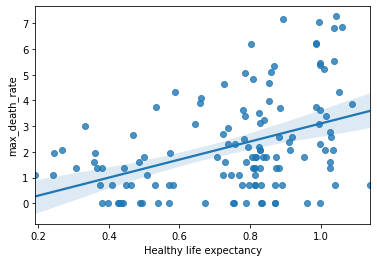

In [43]:
sns.regplot(x=x,y=np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_death_rate'>

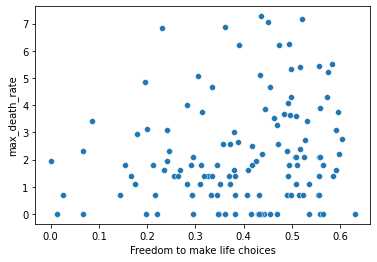

In [44]:
x=data["Freedom to make life choices"]
y=data["max_death_rate"]
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_death_rate'>

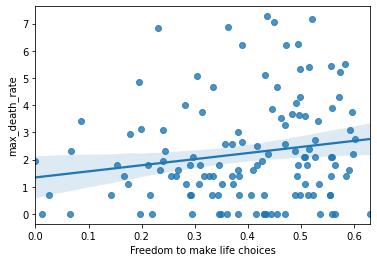

In [45]:
sns.regplot(x=x,y=np.log(y))

# Final Insights
-------------------------------------------------------------------------------------------

1. Total deaths is more related to GDP and Life expectancy
2. The correlation matrix gives a good relation between total deaths in various countries.
3. Freedom to make life choices has very less impact on total deaths.